# Phân tích và xử lí dữ liệu về bệnh đái tháo đường
Tổng quan về tập dữ liệu:
1. Number of times pregnant : số lần có thai.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test : bài kiểm tra độ tích tụ lượng đường trong cơ thể.
3. Diastolic blood pressure (mm Hg): chỉ số đo huyết áp tâm trương (áp lực động mạch khi tim nghỉ ngơi giữa 2 lần co bóp).
4. Triceps skin fold thickness (mm): độ dày da gắp nép của bắp tay sau.
5. 2-Hour serum insulin (mu U/ml): chỉ số đo insulin trong cơ thể sau 2 giờ dung nạp gluco
6. Body mass index (weight in kg/(height in m)^2): chỉ số đo tỉ lệ cân nặng chiều cao theo chuẩn BMI.
7. Diabetes pedigree function: chỉ số đo bệnh về đái tháo đường theo phả hệ.
8. Age (years): tuổi.

# Bắt đầu

## 1. Phân tích tập dữ liệu

### 1.1 thêm các thư viện cần thiết

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as display
import math

### 1.2 Đọc tập dữ liệu 

In [152]:
data_path  = "data/pima-indians-diabetes.csv"
data_names = ["Pregnant","2Hr_Gluco_Concentrate","Blood_Pressure","Skin_Fold","2Hr_Isnulin","BMI","Predigy","Age","Class"]
df_dataset = pd.read_csv(data_path, names = data_names)

In [153]:
df_dataset.head()

,Pregnant,2Hr_Gluco_Concentrate,Blood_Pressure,Skin_Fold,2Hr_Isnulin,BMI,Predigy,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1.3 Kiểm tra tính toàn vẹn của tập dữ liệu

In [154]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pregnant               768 non-null    int64  
 1   2Hr_Gluco_Concentrate  768 non-null    int64  
 2   Blood_Pressure         768 non-null    int64  
 3   Skin_Fold              768 non-null    int64  
 4   2Hr_Isnulin            768 non-null    int64  
 5   BMI                    768 non-null    float64
 6   Predigy                768 non-null    float64
 7   Age                    768 non-null    int64  
 8   Class                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Tập dữ liệu gồm 768 bản ghi không null và hợp lệ kiểu dữ liệu

In [155]:
df_dataset.isna().sum()

Pregnant                 0
2Hr_Gluco_Concentrate    0
Blood_Pressure           0
Skin_Fold                0
2Hr_Isnulin              0
BMI                      0
Predigy                  0
Age                      0
Class                    0
dtype: int64

In [156]:
(df_dataset == 0).sum()

Pregnant                 111
2Hr_Gluco_Concentrate      5
Blood_Pressure            35
Skin_Fold                227
2Hr_Isnulin              374
BMI                       11
Predigy                    0
Age                        0
Class                    500
dtype: int64

- Có nhiều dữ liệu bị thiếu.

#### Loại bỏ các bản ghi bị thiếu dữ liệu trước khi phân tích.

In [ ]:
# df_dataset.drop(
#     df_dataset[
#         (df_dataset['2Hr_Isnulin'] == 0) |
#         (df_dataset['2Hr_Gluco_Concentrate'] == 0) |
#         (df_dataset['Blood_Pressure'] == 0) |
#         (df_dataset['Skin_Fold'] == 0) |
#         (df_dataset['BMI'] == 0)
#     ].index,
#     inplace=True
# )

In [158]:
df_dataset.shape

(392, 9)

- Còn lại 392 bản ghi

### 1.4 Thống kê trên dữ liệu số
- Count, Mean, Standard Deviation, Minimum Value
- 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [159]:
display.display(df_dataset.drop(columns=["Class"]).describe().T)

,count,mean,std,min,25%,50%,75%,max
Pregnant,392.0,3.301020,3.211424,0.000,1.00000,2.0000,5.000,17.00
2Hr_Gluco_Concentrate,392.0,122.627551,30.860781,56.000,99.00000,119.0000,143.000,198.00
Blood_Pressure,392.0,70.663265,12.496092,24.000,62.00000,70.0000,78.000,110.00
Skin_Fold,392.0,29.145408,10.516424,7.000,21.00000,29.0000,37.000,63.00
2Hr_Isnulin,392.0,156.056122,118.841690,14.000,76.75000,125.5000,190.000,846.00
BMI,392.0,33.086224,7.027659,18.200,28.40000,33.2000,37.100,67.10
Predigy,392.0,0.523046,0.345488,0.085,0.26975,0.4495,0.687,2.42
Age,392.0,30.864796,10.200777,21.000,23.00000,27.0000,36.000,81.00


### 1.5 Kiểm tra tần suất xuất hiện của các lớp 

In [160]:
df_dataset["Class"].value_counts()

Class
0    262
1    130
Name: count, dtype: int64

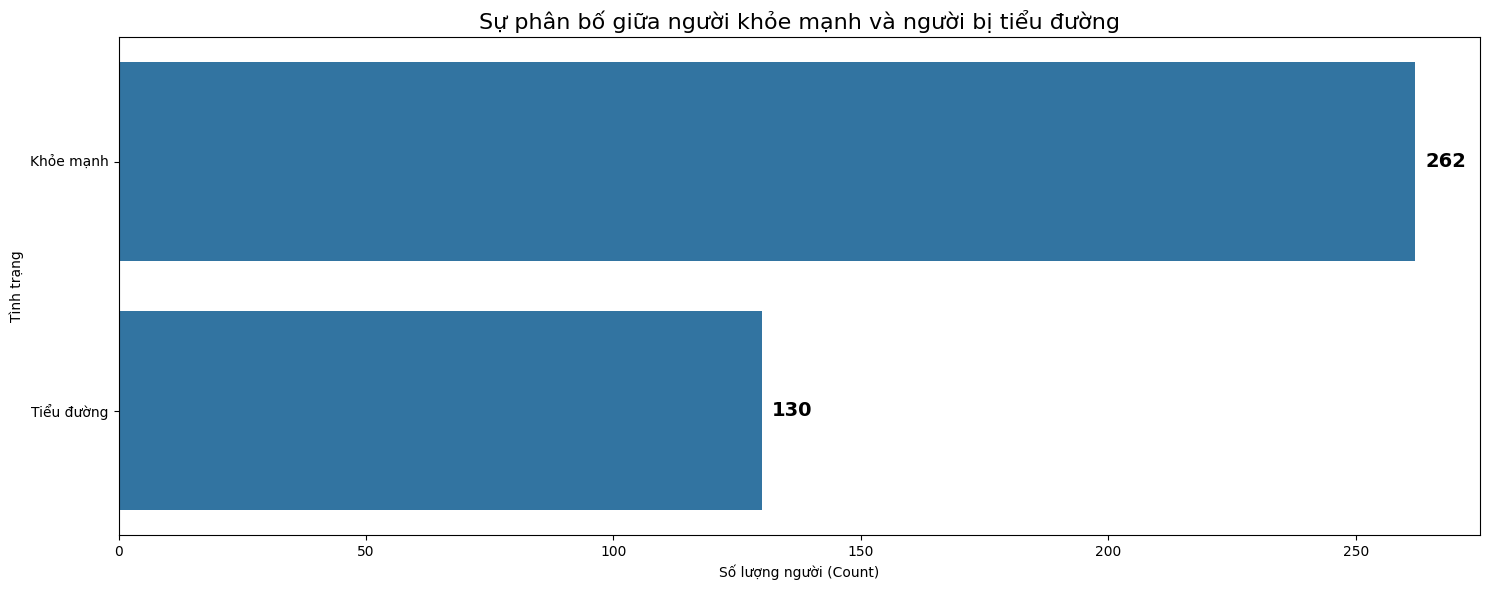

In [161]:
plt.figure(figsize=(15,6))

counts = df_dataset['Class'].value_counts() #đếm số Class trong tập dữ liệu
labels = ['Khỏe mạnh', 'Tiểu đường'] #Thêm label cho biểu đồ
ax = sns.barplot(x=counts.values, y=labels)
plt.title("Sự phân bố giữa người khỏe mạnh và người bị tiểu đường", fontsize=16) #Thêm title
plt.xlabel("Số lượng người (Count)") #Đặt label cho trục X
plt.ylabel("Tình trạng")# Đặt label cho trục Y

for i, p in enumerate(ax.patches): #Bắt đầu một vòng lặp để thêm giá trị số lên từng thanh (bar) của biểu đồ. 
    width = p.get_width() #Lấy chiều dài của thanh hiện tại (chính là số lượng người).
    y_pos = p.get_y() + p.get_height() / 2 #Tính toán vị trí trung tâm theo chiều dọc (Y) của thanh.
    ax.annotate(f'{int(width)}', #Thêm văn bản giá trị số (width) lên biểu đồ
                (width+2, y_pos), #Đặt vị trí của văn bản
                ha='left', va='center',  #Căn lề trái và căn giữa theo chiều dọc.
                fontsize=14, color='black', fontweight='bold') #Tùy chỉnh định dạng văn bản.

plt.tight_layout() #Tự động điều chỉnh các tham số phụ để bố cục biểu đồ được gọn gàng, tránh bị cắt xén labels
plt.show() #Hiển thị biểu đồ ra màn hình.

- Ta có thể thấy tỉ lệ phân lớp đái tháo đường ~50% (2:1). điều này gây ra mất cân bằng cho dự đoán của mô hình theo bài toán phần lớp. (Có thể áp dụng weighted class để giải quyết vấn đề này hay soạn thảo lại tập dữ liệu).

hiển thị tất cả dữ liệu số theo đồ nhóm (grouped bars chart)

## 2.Phân tích đơn biến

### 2.1 So sánh (comparason)

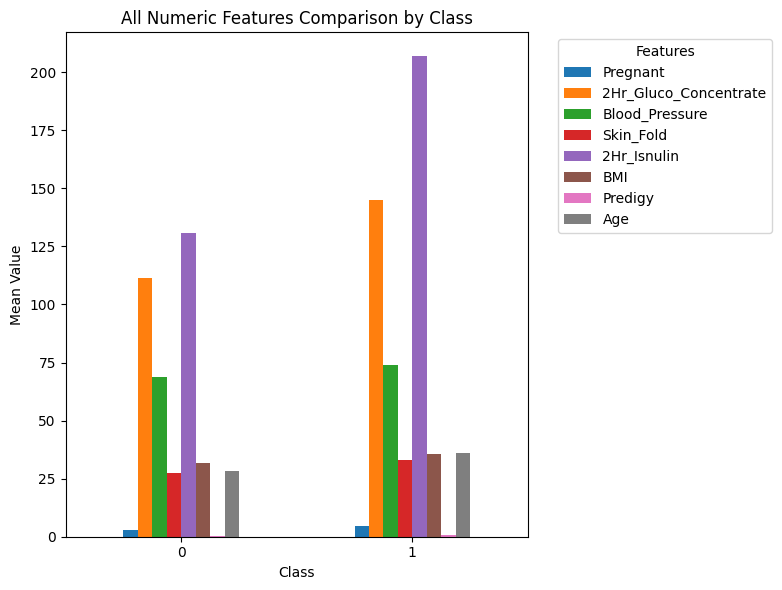

In [162]:
# Automatically select all numeric columns except the class itself
numeric_columns = df_dataset.select_dtypes(include='number').columns.tolist()
numeric_columns.remove('Class')  # Remove the class column

# Group by class and calculate mean for each numeric column
grouped = df_dataset.groupby('Class')[numeric_columns].mean()

# Plot grouped bar chart
grouped.plot(kind='bar', figsize=(8,6))
plt.title("All Numeric Features Comparison by Class")
plt.ylabel("Mean Value")
plt.xlabel("Class")
plt.xticks(rotation=0)
plt.legend(title="Features", bbox_to_anchor=(1.05, 1))  # Put legend outside
plt.tight_layout()
plt.show()

- Dự theo đồ thị ta có thể dễ dàng thấy được sự khác biệt trong chỉ số trung bình Insulin và gluco, dẫn đến việc 2 thuộc tính này là không thể thiếu trong việc dự đoán bệnh đái tháo đường.

## 3.Phân tích đa biến 

### 3.1 Sự tương quan giữa các tính chất (correlation)

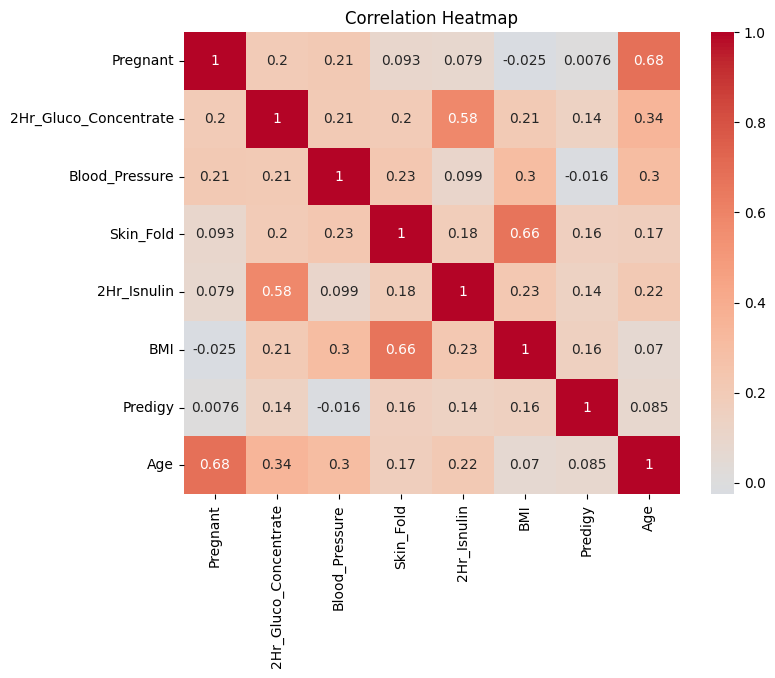

In [163]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df_dataset.drop(columns=["Class"]).corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

- Cặp chỉ số BMI và da gấp nép có độ tương quang cao (.66), có nghĩa là BMI càng lớn thì da gấp nép càng dày. Sự tương quan này có thể là dữ liệu tốt trong việc dự đoán bệnh đái tháo đường vì nó cho biết sự mất cân đối của 1 cá thể.
- Tuổi và số lần có thai (.68) có độ tương quang cao nhất và ngoài ra thì theo các bài báo khoa học ta biết được phụ nữ có thai dễ mắc phải bệnh hơn khi càng lớn tuổi và có thai nhiều lần.
- Ngoài ra thì còn chỉ số thực nghiệm Insulin và Gluco (.58) là một trong những công cụ mạnh nhất hay thông tin tốt nhất và quan hệ mật thiết nhất với bệnh đái tháo đường trong y học.

In [164]:
#Hàm tạo scatterplot 2 features
def scatter_fea1_fea2(feature1,feature2):
    plt.figure(figsize=(12,8)) #Tạo bảng kích thước 12,8
    plt.title(f"Biểu đồ phân tán của {feature1} và {feature2} dựa vào Class") #Thêm title truyền vào tên của 2 features
    #Vẽ scatterplot với trục X là feature1, cột Y là feature2 dựa vào Class và map để sửa lại label thành chữ
    chart = sns.scatterplot(x=df_dataset[feature1],y=df_dataset[feature2],hue=df_dataset['Class'].map({0:"Khỏe mạnh",1:"Tiểu đường"}))
    return chart

# Hàm Zoom vào các khoảng phân tán dày đặt
def scatter_fea1_fea2_zoom(feature1,feature2,x_min,x_max,y_min,y_max):
    plt.figure(figsize=(12,8))
    plt.title(f"Biểu đồ phân tán của {feature1} và {feature2} dựa vào Class")
    chart = sns.scatterplot(x=df_dataset[feature1],y=df_dataset[feature2],hue=df_dataset['Class'].map({0:"Khỏe mạnh",1:"Tiểu đường"}))
    plt.xlim(x_min, x_max) #giới hạn trục X
    plt.ylim(y_min, y_max) #giới hạn trục Y
    return chart

def highlight(chart,x_min,x_max,y_min,y_max):
    #Các cạnh chạy theo chiều kim đồng hồ
    plt.plot([x_min, x_max], [y_max, y_max], linewidth=2, color = 'red') #cạnh 1 
    plt.plot([x_max, x_max], [y_min, y_max], linewidth=2, color = 'red')#cạnh 2
    plt.plot([x_min, x_max], [y_min, y_min], linewidth=2, color = 'red')#cạnh 3
    plt.plot([x_min, x_min], [y_min, y_max], linewidth=2, color = 'red')#cạnh 4

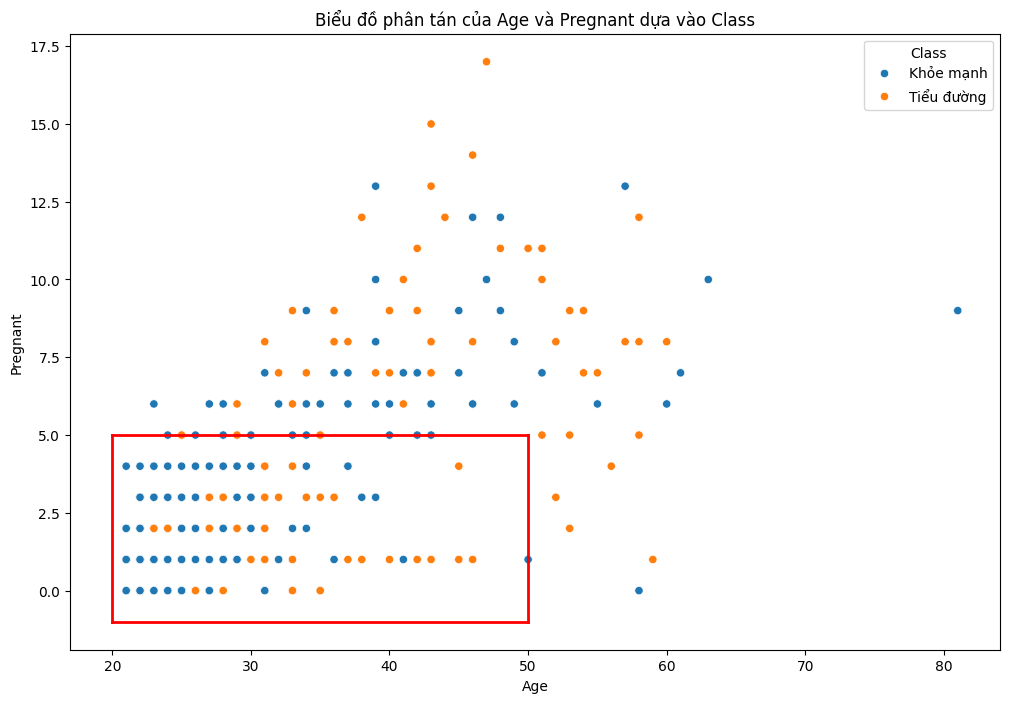

In [165]:
chart = scatter_fea1_fea2('Age','Pregnant')
highlight(chart,20,50,-1,5)

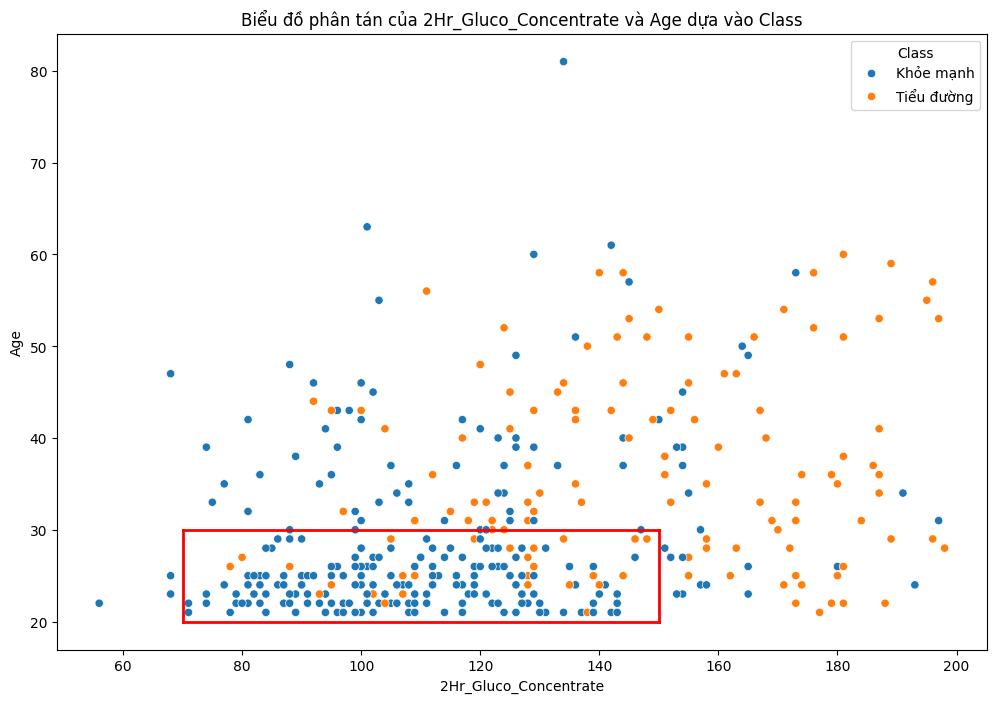

In [166]:
chart = scatter_fea1_fea2('2Hr_Gluco_Concentrate','Age')
highlight(chart,70,150,20,30)

C:\Users\Keqing\AppData\Local\Temp\ipykernel_21724\453604762.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, x=['Khỏe mạnh', 'Tiểu đường'], y=temp['Class'].value_counts(),palette=['#1f77b4', '#ff7f0e'])


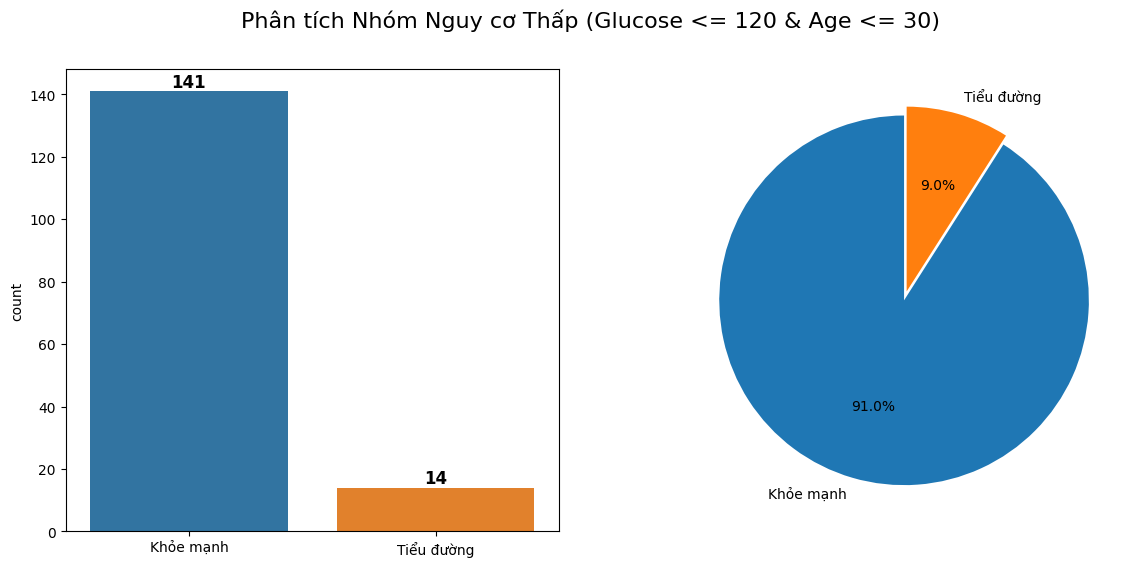

In [167]:
condition = (df_dataset['2Hr_Gluco_Concentrate'] <= 120) & (df_dataset['Age'] <= 30)
temp = df_dataset[condition].copy() 
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

fig.suptitle('Phân tích Nhóm Nguy cơ Thấp (Glucose <= 120 & Age <= 30)', fontsize=16)
ax1 = axes[0] 
sns.barplot(ax=ax1, x=['Khỏe mạnh', 'Tiểu đường'], y=temp['Class'].value_counts(),palette=['#1f77b4', '#ff7f0e'])

for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')


ax2 = axes[1] 
ax2.pie(
    x=temp['Class'].value_counts(), 
    labels=labels, 
    autopct='%.1f%%', 
    startangle=90, 
    colors=['#1f77b4', '#ff7f0e'],
    explode=(0, 0.05)
)

plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.pairplot(df_dataset, hue= "Class")
plt.title("Correlogram")
plt.show()

<Figure size 800x600 with 0 Axes>

#### Nhận xét:
- chỉ có các cặp với chỉ số gluco là có sự phân cụm dễ nhìn nhất và phân vùng dễ nhìn thấy hơn với căn bệnh đái tháo đường.


### 3.2 Sự phân bố (Distribution)

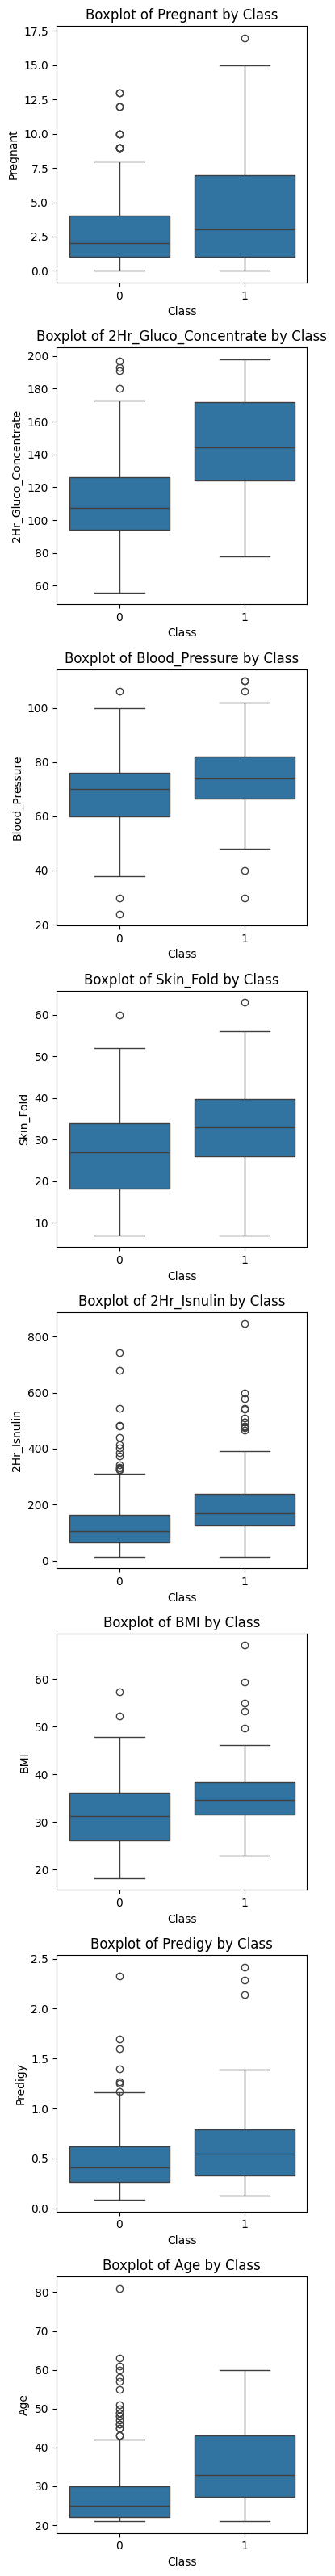

In [ ]:
numeric_cols = df_dataset.select_dtypes(include='number').columns.drop('Class')

fig, axes = plt.subplots(nrows=len(numeric_cols), figsize=(4, 4*len(numeric_cols)))

for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x='Class', y=col, data=df_dataset, ax=ax)
    ax.set_title(f"Boxplot of {col} by Class")

plt.tight_layout()
plt.show()

- Dựa trên biểu đồ boxplot ta có thể thấy được đa phần các thuộc tính đơn đều có ngoại lệ. Nhưng một số trường hợp có độ xiên lớn do ngoại lệ cao và dày đặc như tuổi tác hay insulin. Dù các giá trị này là hợp lí nhưng mật độ và độ lớn của ngoại lệ có thể ảnh hưởng đến phán đoán của mô hình.
- Ngoài ra thì sự phần bố đáng tập trung là chỉ số gluco theo phân lớp đái tháo đường, người không bị đái tháo đường có 50% rơi vào ~95 đến ~120, trong khi đó người mắc thì có 50% rơi vào ~125 đến ~175. 

## 4.Thông tin thêm
- Mẫu bất thường:
    + Insulin tối thiểu đạt 14 U/ml rất thấp so vơi tiêu chuẩn bình thường là 16-166 U/ml.
    + Huyết áp thấp nhất là 24 mmHg trong khi theo chuẩn thì tối thiểu là trên 40 mmHg
    + BMI của mẫu cao nhất lên đến 67.1 là bất thường so với tiêu chuẩn vì 50 là béo phì bệnh lí và hiếm.
- Dữ liệu thiếu:
    + Gluco (5 mẫu).
    + Insulin (347 mẫu).
    + BMI (11 mẫu).
    + Huyết áp (35 mẫu).
    + Độ dày gấp nép da ( mẫu 227).
- Ngoại lệ đáng chú ý:
    + Insulin.
          => Có ngưỡng tối thiểu 14 (bất thường) và ngoại lệ 846 rất cao so với phân bố bình thường nhưng là ngoại lệ hợp lí
    + BMI.
          => Trung bình = 33, nhưng sở hữu giá trị tối đa = 67.1 kg/m²(bất thường nên có cả các ngoại lệ hợp lí khác < 50).
    + Số lần có thai.
          => Đây là ngoại lệ thống kê (đa số ≤ 6), nhưng mẫu lên đến 17 lần không phải bất thường dữ liệu.
    + chỉ số đo bệnh về đái tháo đường theo phả hệ.
          => Hầu hết < 1, nhưng có mẫu 2.42.